### **Reading Combined Flights 2020 File**

In [2]:
import pandas as pd

file_path = r"C:\Users\Hites\OneDrive\Desktop\CDAC 2024\Project\Dataset\Combined_Flights_2020.csv"

df = pd.read_csv(file_path)

print(df.head())
print(df.info())

   FlightDate      Airline Origin Dest  Cancelled  Diverted  CRSDepTime  \
0  2020-09-01  Comair Inc.    PHL  DAY      False     False        1905   
1  2020-09-02  Comair Inc.    PHL  DAY      False     False        1905   
2  2020-09-03  Comair Inc.    PHL  DAY      False     False        1905   
3  2020-09-04  Comair Inc.    PHL  DAY      False     False        1905   
4  2020-09-05  Comair Inc.    PHL  DAY      False     False        1905   

   DepTime  DepDelayMinutes  DepDelay  ...  WheelsOff  WheelsOn  TaxiIn  \
0   1858.0              0.0      -7.0  ...     1914.0    2030.0     4.0   
1   1858.0              0.0      -7.0  ...     1914.0    2022.0     5.0   
2   1855.0              0.0     -10.0  ...     2000.0    2117.0     5.0   
3   1857.0              0.0      -8.0  ...     1910.0    2023.0     4.0   
4   1856.0              0.0      -9.0  ...     1910.0    2022.0     4.0   

   CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups  ArrTimeBlk  \
0        2056     -22.0      

### **Total Rows in 2020 DataSet**

In [3]:
print("Total in 2019 Dataset rows:", len(df))

Total in 2019 Dataset rows: 5022397


### **Null Values in Dataset**

In [4]:
# Find the number of null values in each column
null_values = df.isnull().sum()

# Display the null values count for each column
print(null_values)

FlightDate                 0
Airline                    0
Origin                     0
Dest                       0
Cancelled                  0
                       ...  
ArrDel15              309467
ArrivalDelayGroups    309467
ArrTimeBlk                 0
DistanceGroup              0
DivAirportLandings        87
Length: 61, dtype: int64


### Show Percentage of Missing Values

In [5]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

DepTime                 5.965677
DepDelayMinutes         5.966932
DepDelay                5.966932
ArrTime                 6.013045
ArrDelayMinutes         6.161739
AirTime                 6.161739
CRSElapsedTime          0.000100
ActualElapsedTime       6.161739
Tail_Number             3.354036
DepDel15                5.966932
DepartureDelayGroups    5.966932
TaxiOut                 5.981725
WheelsOff               5.981725
WheelsOn                6.013065
TaxiIn                  6.013065
ArrDelay                6.161739
ArrDel15                6.161739
ArrivalDelayGroups      6.161739
DivAirportLandings      0.001732
dtype: float64


In [6]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]

print(null_columns)


DepTime                 299620
DepDelayMinutes         299683
DepDelay                299683
ArrTime                 301999
ArrDelayMinutes         309467
AirTime                 309467
CRSElapsedTime               5
ActualElapsedTime       309467
Tail_Number             168453
DepDel15                299683
DepartureDelayGroups    299683
TaxiOut                 300426
WheelsOff               300426
WheelsOn                302000
TaxiIn                  302000
ArrDelay                309467
ArrDel15                309467
ArrivalDelayGroups      309467
DivAirportLandings          87
dtype: int64


### **Classify the Columns According to their data types**

In [7]:
# Identify time-series columns (Date columns)
time_series_cols = [col for col in df.columns if "date" in col.lower()]

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns (excluding numerical and time-series)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Identify boolean columns (True/False)
boolean_cols = [col for col in df.columns if df[col].dropna().isin([True, False]).all()]

# Print results
print("Time-Series Columns:", time_series_cols)
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Boolean Columns:", boolean_cols)

Time-Series Columns: ['FlightDate']
Numerical Columns: ['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'DOT_ID_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginStateFips', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestStateFips', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DistanceGroup', 'DivAirportLandings']
Categorical Columns: ['FlightDate', 'Airline', 'Origin', 'Dest', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'IATA_Code_Marketing_Airline', 'Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginCityName', '

## **-: Handling NUll Values :-**

### 1. Drop Columns with Too Many Nulls (If >50%)


In [8]:
df = df.dropna(thresh=len(df) * 0.5, axis=1)

### 2. Handle Missing Values Based on Data Type
🔹 Numerical Columns

Use Mean if no outliers (normal distribution).

Use Median if outliers exist (skewed distribution). 

In [9]:
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        if df[col].skew() > 1 or df[col].skew() < -1:  # Check for skewness
            df[col].fillna(df[col].median(), inplace=True)  # Use median
        else:
            df[col].fillna(df[col].mean(), inplace=True)  # Use mean

C:\Users\Hites\AppData\Local\Temp\ipykernel_26948\2454565797.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # Use mean
C:\Users\Hites\AppData\Local\Temp\ipykernel_26948\2454565797.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


🔹 Categorical Columns

Use Mode (most frequent value).

Use "Unknown" if mode isn't appropriate.

### 🔹 Boolean Columns (Like Cancelled, Diverted, Delayed)
Fill with False (assuming missing means no event occurred).

In [10]:
boolean_cols = ["Cancelled", "Diverted", "DepDel15", "ArrDel15", "Delayed"]

for col in boolean_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(False, inplace=True)

### 🔹 Time-Series Columns (Like FlightDate)
Use Forward & Backward Fill to propagate values.

In [11]:
if "FlightDate" in df.columns:
    df.sort_values(by="FlightDate", inplace=True)
    df.fillna(method="ffill", inplace=True)
    df.fillna(method="bfill", inplace=True)

C:\Users\Hites\AppData\Local\Temp\ipykernel_26948\411833513.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
C:\Users\Hites\AppData\Local\Temp\ipykernel_26948\411833513.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)


### 🔹 3. Drop Remaining Rows (if very few nulls left)

In [12]:
df.dropna(inplace=True)

### 🔹 Final Check For Null Vlaues

In [13]:
print("Missing Values After Handling:")
print(df.isnull().sum())

Missing Values After Handling:
FlightDate            0
Airline               0
Origin                0
Dest                  0
Cancelled             0
                     ..
ArrDel15              0
ArrivalDelayGroups    0
ArrTimeBlk            0
DistanceGroup         0
DivAirportLandings    0
Length: 61, dtype: int64


In [14]:
from IPython.display import display

display(df)


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
2985623,2020-01-01,United Air Lines Inc.,SLC,ORD,False,False,1120,1127.0,7.0,7.0,...,1218.0,1544.000000,11.0,1524,31.0,1.0,2.0,1500-1559,6,0.0
2713372,2020-01-01,Spirit Air Lines,BWI,IAH,False,False,1220,1226.0,6.0,6.0,...,1235.0,1450.000000,12.0,1458,4.0,0.0,0.0,1400-1459,5,0.0
2658656,2020-01-01,Horizon Air,PDX,EUG,False,False,2230,2225.0,0.0,-5.0,...,2236.0,2300.000000,3.0,2313,-10.0,0.0,-1.0,2300-2359,1,0.0
2658657,2020-01-01,Horizon Air,EUG,PDX,False,False,935,927.0,0.0,-8.0,...,939.0,1008.000000,5.0,1021,-8.0,0.0,-1.0,1000-1059,1,0.0
2658658,2020-01-01,Horizon Air,GEG,PDX,False,False,700,650.0,0.0,-10.0,...,701.0,759.000000,3.0,825,-23.0,0.0,-2.0,0800-0859,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299719,2020-12-31,Endeavor Air Inc.,ECP,ATL,False,False,1200,1156.0,0.0,-4.0,...,1206.0,1349.000000,4.0,1410,-17.0,0.0,-2.0,1400-1459,1,0.0
1572177,2020-12-31,Allegiant Air,VPS,HOU,False,False,800,756.0,0.0,-4.0,...,809.0,945.000000,6.0,938,13.0,0.0,0.0,0900-0959,3,0.0
1299705,2020-12-31,Endeavor Air Inc.,EWR,DTW,False,False,925,920.0,0.0,-5.0,...,936.0,1111.000000,10.0,1135,-14.0,0.0,-1.0,1100-1159,2,0.0
1299674,2020-12-31,Endeavor Air Inc.,RDU,FLL,False,False,1120,1118.0,0.0,-2.0,...,1138.0,1316.000000,3.0,1333,-14.0,0.0,-1.0,1300-1359,3,0.0


### Statistical summary of the DataFrame:
### Descriptive Analysis

In [15]:
df.describe()

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
count,5.022397e+06,5.022397e+06,5.022397e+06,5.022397e+06,5.022397e+06,5.022397e+06,5.022397e+06,5.022397e+06,5.022397e+06,5.022397e+06,...,5.022397e+06,5.022397e+06,5.022397e+06,5.022397e+06,5.022397e+06,5.022397e+06,5.022397e+06,5.022397e+06,5.022397e+06,5.022397e+06
mean,1.315357e+03,1.312706e+03,6.357645e+00,1.702899e+00,1.480714e+03,6.522842e+00,1.051252e+02,1.351304e+02,1.273683e+02,7.546099e+02,...,1.522240e+01,1.337111e+03,1.473272e+03,6.725589e+00,1.494236e+03,-5.241750e+00,9.337275e-02,-8.020003e-01,3.496368e+00,2.814194e-03
std,4.615186e+02,4.528258e+02,3.423814e+01,3.531794e+01,4.682908e+02,3.364748e+01,6.399863e+01,6.729924e+01,6.515294e+01,5.504107e+02,...,8.101464e+00,4.526101e+02,4.663883e+02,4.944215e+00,4.791379e+02,3.724946e+01,2.909541e-01,1.717653e+00,2.180196e+00,1.088493e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,-1.310000e+02,1.000000e+00,0.000000e+00,7.000000e+00,-7.700000e+01,1.300000e+01,2.900000e+01,...,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-1.390000e+02,0.000000e+00,-2.000000e+00,1.000000e+00,0.000000e+00
25%,9.250000e+02,9.400000e+02,0.000000e+00,-7.000000e+00,1.130000e+03,0.000000e+00,6.000000e+01,8.600000e+01,8.100000e+01,3.500000e+02,...,1.100000e+01,9.550000e+02,1.125000e+03,4.000000e+00,1.123000e+03,-1.800000e+01,0.000000e+00,-2.000000e+00,2.000000e+00,0.000000e+00
50%,1.312000e+03,1.312706e+03,0.000000e+00,-4.000000e+00,1.480714e+03,0.000000e+00,8.900000e+01,1.190000e+02,1.120000e+02,6.100000e+02,...,1.300000e+01,1.337111e+03,1.473272e+03,5.000000e+00,1.516000e+03,-1.100000e+01,0.000000e+00,-1.000000e+00,3.000000e+00,0.000000e+00
75%,1.710000e+03,1.656000e+03,0.000000e+00,-1.000000e+00,1.841000e+03,0.000000e+00,1.320000e+02,1.650000e+02,1.550000e+02,9.920000e+02,...,1.700000e+01,1.710000e+03,1.836000e+03,8.000000e+00,1.901000e+03,-2.000000e+00,0.000000e+00,-1.000000e+00,4.000000e+00,0.000000e+00
max,2.359000e+03,2.400000e+03,3.890000e+03,3.890000e+03,2.400000e+03,3.864000e+03,6.980000e+02,7.000000e+02,7.630000e+02,5.095000e+03,...,1.890000e+02,2.400000e+03,2.400000e+03,2.910000e+02,2.400000e+03,3.864000e+03,1.000000e+00,1.200000e+01,1.100000e+01,9.000000e+00


### Categorical Columns Analysis

In [16]:
print("\nCategorical columns analysis:")
print(df.select_dtypes(include=['object']).nunique())

## It is good to do One_hot_encoding  with this catagorical columns


Categorical columns analysis:
FlightDate                                  366
Airline                                      25
Origin                                      379
Dest                                        379
Marketing_Airline_Network                    10
Operated_or_Branded_Code_Share_Partners      15
IATA_Code_Marketing_Airline                  10
Operating_Airline                            25
IATA_Code_Operating_Airline                  25
Tail_Number                                6187
OriginCityName                              373
OriginState                                  52
OriginStateName                              52
DestCityName                                373
DestState                                    52
DestStateName                                52
DepTimeBlk                                   19
ArrTimeBlk                                   19
dtype: int64


## Bar plot for delayed vs non-delayed flights


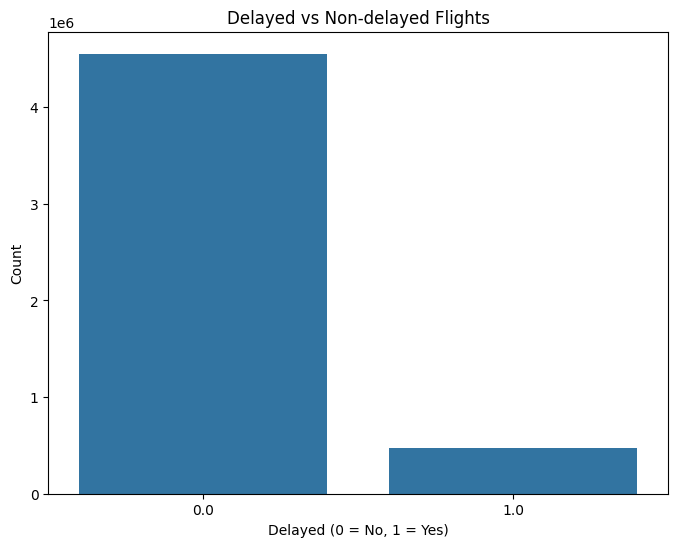

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(x='ArrDel15', data=df)
plt.title('Delayed vs Non-delayed Flights')
plt.xlabel('Delayed (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## **Calculate Total Flights and Delayed Flights in Year**


In [18]:
df_yearly = df.groupby('Year').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per year
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per year
).reset_index()

# Step 2: Calculate Delayed Percentage per Year
df_yearly['delayed_percentage'] = (df_yearly['delayed_flights'] / df_yearly['total_flights']) * 100

# Step 3: Display the results
print(df_yearly)


   Year  total_flights  delayed_flights  delayed_percentage
0  2020        5022397           468955            9.337275


## Delayed percentage per month

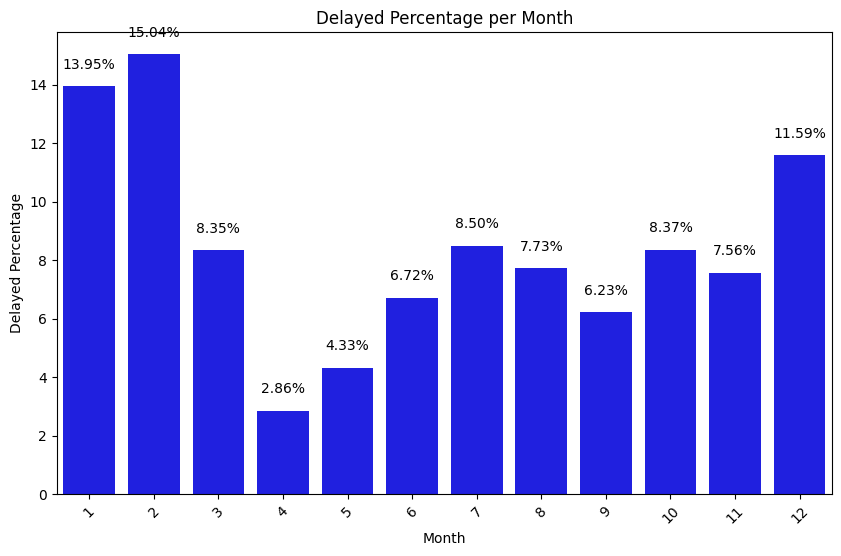

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Month
df_monthly = df.groupby('Month').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per month
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per month
).reset_index()

# Step 2: Calculate Delayed Percentage per Month
df_monthly['delayed_percentage'] = (df_monthly['delayed_flights'] / df_monthly['total_flights']) * 100

# Step 3: Create Bar Plot without Color Shades
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='delayed_percentage', data=df_monthly, color='blue')  # Single solid color

# Add data labels
for index, row in df_monthly.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

plt.xlabel("Month")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Month")
plt.xticks(rotation=45)
plt.show()


## Total Flights and Delayed Flights Per Day of the Week

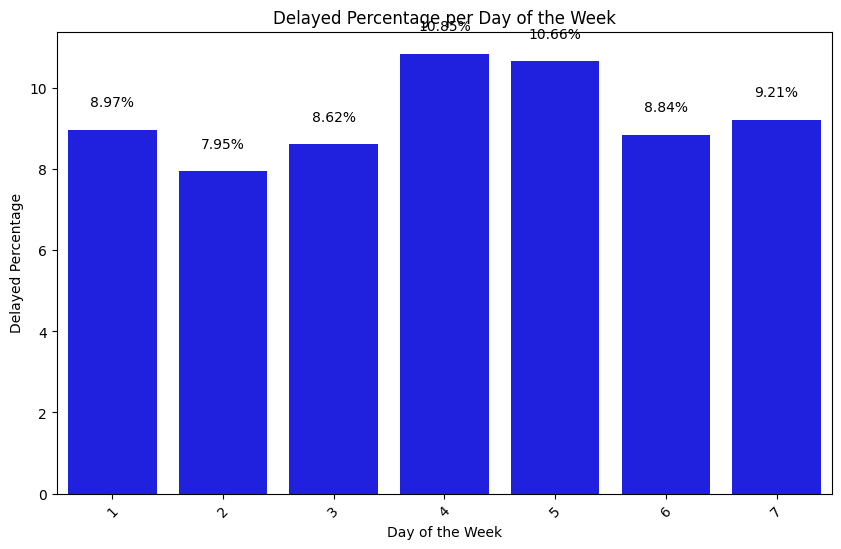

In [20]:
# Step 1: Calculate Total Flights and Delayed Flights Per Day of the Week
df_weekday = df.groupby('DayOfWeek').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per day of the week
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per day of the week
).reset_index()

# Step 2: Calculate Delayed Percentage per Day of the Week
df_weekday['delayed_percentage'] = (df_weekday['delayed_flights'] / df_weekday['total_flights']) * 100

# Step 3: Create Bar Plot without Color Shades
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='delayed_percentage', data=df_weekday, color='blue')  # Single solid color

# Add data labels
for index, row in df_weekday.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

plt.xlabel("Day of the Week")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Day of the Week")
plt.xticks(rotation=45)
plt.show()


## **Airline-Wise Flight Delay Analysis**

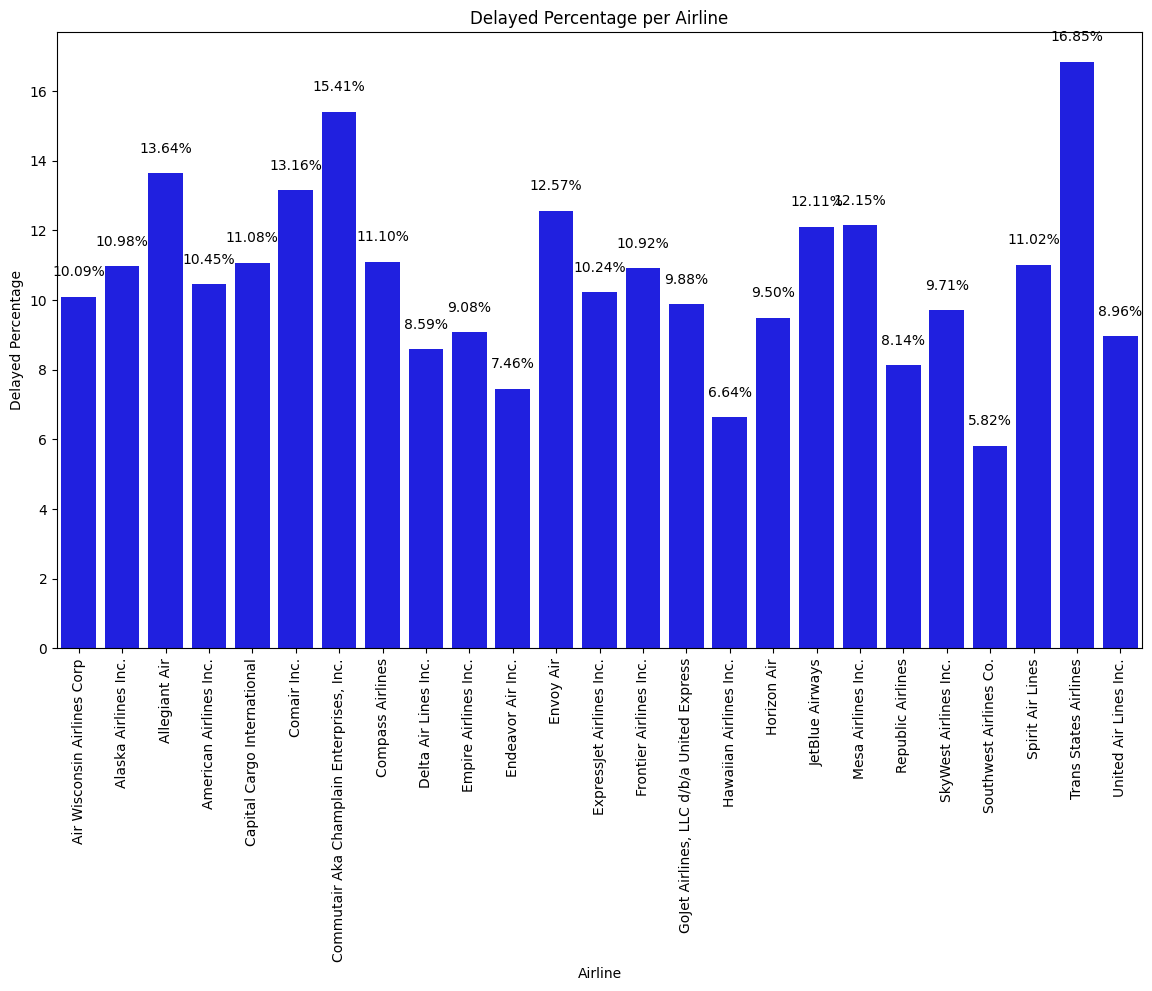

In [21]:
# Step 1: Calculate Total Flights and Delayed Flights Per Airline
df_airline = df.groupby('Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Airline
df_airline['delayed_percentage'] = (df_airline['delayed_flights'] / df_airline['total_flights']) * 100

# Step 3: Create Bar Plot without Color Shades
plt.figure(figsize=(14, 8))
sns.barplot(x='Airline', y='delayed_percentage', data=df_airline, color='blue')  # Single solid color

# Add data labels
for index, row in df_airline.iterrows():
    plt.text(row.name, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

plt.xlabel("Airline")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Airline")
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.show()


## **Airline-Wise Delay Analysis with Total and Delayed Flights**

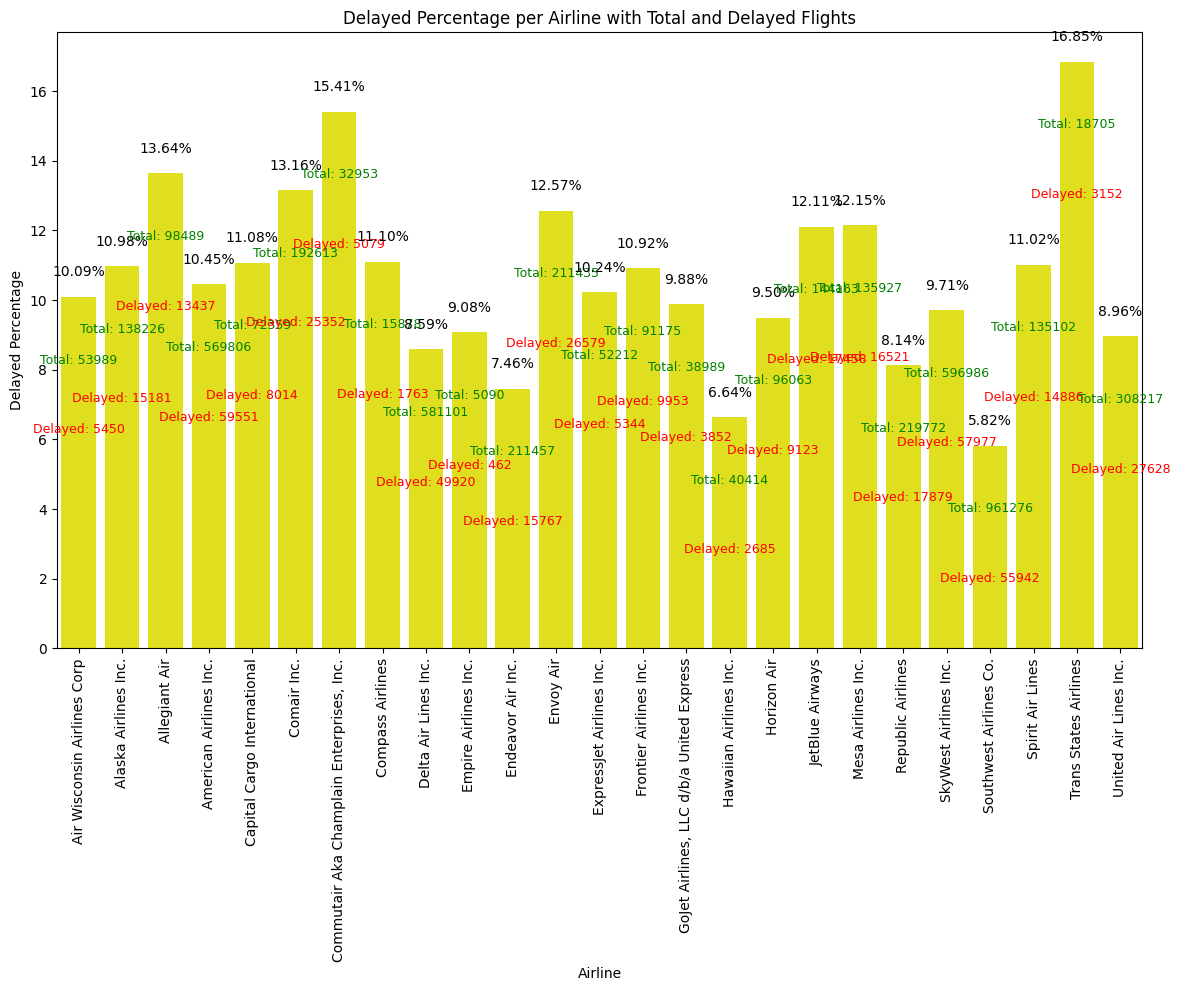

In [22]:
# Step 1: Calculate Total Flights and Delayed Flights Per Airline
df_airline = df.groupby('Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Airline
df_airline['delayed_percentage'] = (df_airline['delayed_flights'] / df_airline['total_flights']) * 100

# Step 3: Create Bar Plot without Color Shades
plt.figure(figsize=(14, 8))
sns.barplot(x='Airline', y='delayed_percentage', data=df_airline, color='yellow')  # Single solid color

# Add data labels for Delayed Percentage, Total Flights, and Delayed Flights
for index, row in df_airline.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the delayed percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size
    
    # Display total flights and delayed flights next to the bars
    plt.text(index, row['delayed_percentage'] - 2,  # Position for total flights label (adjust position to fit)
             f'Total: {row["total_flights"]}',  # Display total flights
             ha='center', va='bottom', fontsize=9, color='green')  # Color for total flights
    
    plt.text(index, row['delayed_percentage'] - 4,  # Position for delayed flights label (adjust position to fit)
             f'Delayed: {row["delayed_flights"]}',  # Display delayed flights
             ha='center', va='bottom', fontsize=9, color='red')  # Color for delayed flights

plt.xlabel("Airline")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Airline with Total and Delayed Flights")
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.show()


## **Origin Airport-Wise Delay Analysis: Identifying Airports with Highest Delays**

In [23]:
# Step 1: Calculate Total Flights and Delayed Flights Per Origin
df_origin = df.groupby('Origin').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per origin
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per origin
).reset_index()

# Step 2: Calculate Delayed Percentage per Origin
df_origin['delayed_percentage'] = (df_origin['delayed_flights'] / df_origin['total_flights']) * 100

# Display all rows in tabular form sorted by delayed_percentage in descending order
pd.set_option('display.max_rows', None)  # Show all rows
df_origin_display = df_origin[['Origin', 'total_flights', 'delayed_flights', 'delayed_percentage']].sort_values(by='delayed_percentage', ascending=False)

print(df_origin_display)


    Origin  total_flights  delayed_flights  delayed_percentage
64     CDB            132               89           67.424242
9      ADK            105               39           37.142857
102    DLG            213               62           29.107981
32     BET            502              142           28.286853
283    PPG             26                7           26.923077
13     AKN            280               66           23.571429
329    SHR            465              105           22.580645
344    STC            141               30           21.276596
155    HDN           1648              330           20.024272
22     ASE           4871              949           19.482652
204    LCK           1064              207           19.454887
51     BQN            562              109           19.395018
171    IAG            549              104           18.943534
1      ABI           1724              322           18.677494
364    TYR           1085              201           18

## **List of Distinct Operating Airlines in the Dataset**

In [24]:
# Find distinct operating airlines
distinct_airlines = df['Operating_Airline'].unique()

# Print the distinct operating airlines
print(distinct_airlines)

['UA' 'NK' 'QX' 'AX' 'MQ' 'AA' 'ZW' 'C5' 'G7' 'F9' 'DL' 'EM' 'B6' 'EV'
 'YX' 'OH' 'HA' '9E' 'G4' 'YV' 'PT' 'WN' 'CP' 'OO' 'AS']


## **Delayed Percentage per Operating Airline**

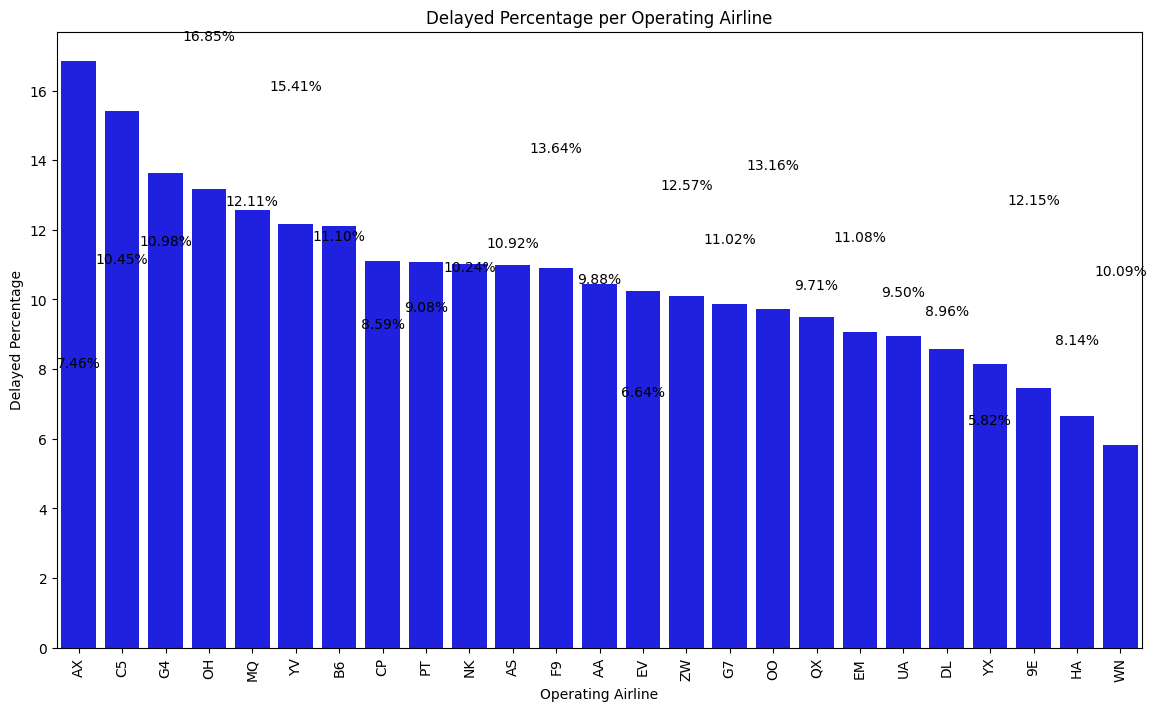

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate Total Flights and Delayed Flights Per Operating Airline
df_operating_airline = df.groupby('Operating_Airline').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per operating airline
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per operating airline
).reset_index()

# Step 2: Calculate Delayed Percentage per Operating Airline
df_operating_airline['delayed_percentage'] = (df_operating_airline['delayed_flights'] / df_operating_airline['total_flights']) * 100

# Step 3: Sort the values by delayed percentage
df_operating_airline = df_operating_airline.sort_values(by='delayed_percentage', ascending=False)

# Step 4: Create a Bar Plot with Delayed Percentage
plt.figure(figsize=(14, 8))
sns.barplot(x='Operating_Airline', y='delayed_percentage', data=df_operating_airline, color='blue')  # Solid color

# Add data labels for Delayed Percentage
for index, row in df_operating_airline.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the delayed percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

plt.xlabel("Operating Airline")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Operating Airline")
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.show()


## **Flight Delay Analysis by Distance Group**

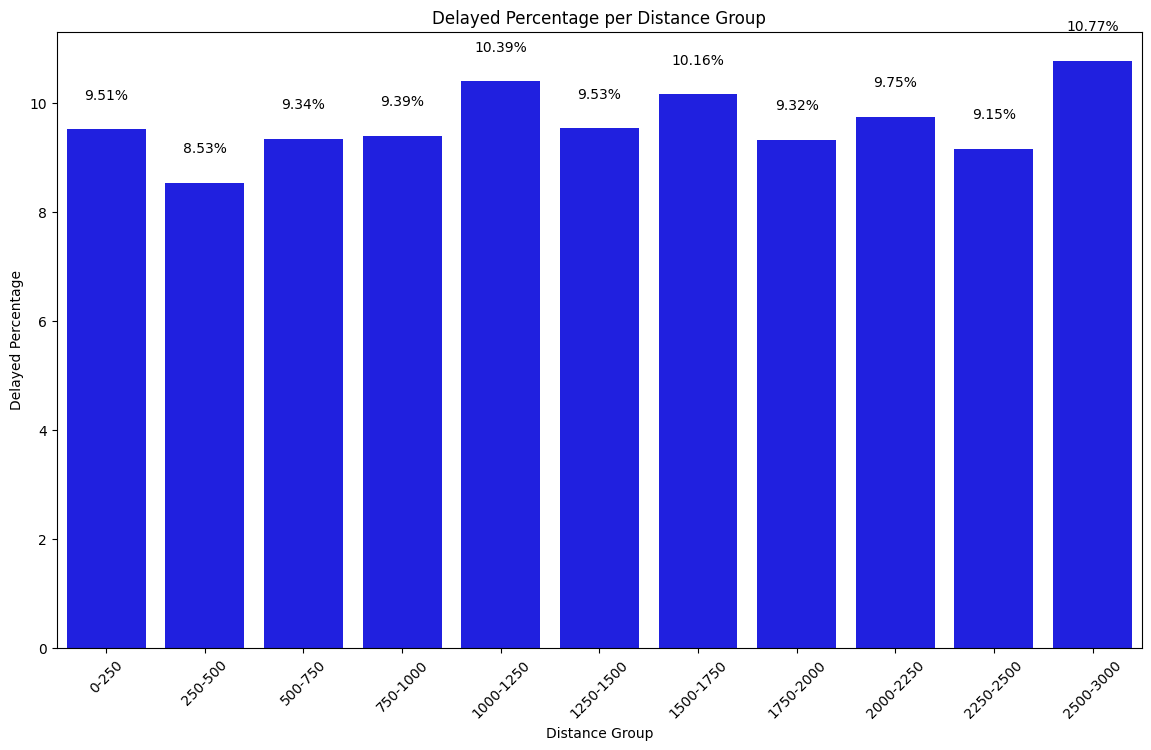

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Calculate Total Flights and Delayed Flights Per Distance Group
df_distance_group = df.groupby('DistanceGroup').agg(
    total_flights=('ArrDel15', 'size'),  # Count total flights per distance group
    delayed_flights=('ArrDel15', lambda x: (x == 1).sum())  # Count delayed flights per distance group
).reset_index()

# Step 2: Calculate Delayed Percentage per Distance Group
df_distance_group['delayed_percentage'] = (df_distance_group['delayed_flights'] / df_distance_group['total_flights']) * 100

# Step 3: Map numerical distance groups to actual range labels
distance_ranges = {
    1: '0-250',
    2: '250-500',
    3: '500-750',
    4: '750-1000',
    5: '1000-1250',
    6: '1250-1500',
    7: '1500-1750',
    8: '1750-2000',
    9: '2000-2250',
    10: '2250-2500',
    11: '2500-3000'
}

df_distance_group['DistanceRange'] = df_distance_group['DistanceGroup'].map(distance_ranges)

# Step 4: Sort the values by delayed percentage
df_distance_group = df_distance_group.sort_values(by='delayed_percentage', ascending=False)

# Step 5: Convert 'DistanceRange' to a categorical column with correct order
df_distance_group['DistanceRange'] = pd.Categorical(df_distance_group['DistanceRange'], 
                                                     categories=distance_ranges.values(), 
                                                     ordered=True)

# Step 6: Create a Bar Plot with Delayed Percentage using the actual distance range labels
plt.figure(figsize=(14, 8))
sns.barplot(x='DistanceRange', y='delayed_percentage', data=df_distance_group, color='blue')  # Solid color

# Add data labels for Delayed Percentage
for index, row in df_distance_group.iterrows():
    plt.text(index, row['delayed_percentage'] + 0.5,  # Position of the label
             f'{row["delayed_percentage"]:.2f}%',  # Format the delayed percentage with 2 decimal places
             ha='center', va='bottom', fontsize=10)  # Positioning and font size

# Labeling axes and title
plt.xlabel("Distance Group")
plt.ylabel("Delayed Percentage")
plt.title("Delayed Percentage per Distance Group")
plt.xticks(rotation=45)  # Rotate distance group labels for better readability
plt.show()


## **Displays the Top 10 destination cities with the highest delay percentages**

In [27]:
# Group by destination and count the number of delayed flights
delayed_by_dest = df.groupby('DestCityName')['ArrDel15'].sum().reset_index()

# Count total flights per destination
total_flights_by_dest = df.groupby('DestCityName')['ArrDel15'].count().reset_index()

# Merge both dataframes
delayed_by_dest = delayed_by_dest.merge(total_flights_by_dest, on='DestCityName', suffixes=('_delayed', '_total'))

# Calculate percentage of delayed flights
delayed_by_dest['Delay_Percentage'] = (delayed_by_dest['ArrDel15_delayed'] / delayed_by_dest['ArrDel15_total']) * 100

# Sort the cities by percentage of delayed flights
delayed_by_dest_sorted = delayed_by_dest.sort_values(by='Delay_Percentage', ascending=False)

# Print the top 10 cities with the highest percentage of delayed flights
print(delayed_by_dest_sorted[['DestCityName', 'Delay_Percentage']].head(10))


                 DestCityName  Delay_Percentage
2             Adak Island, AK         44.761905
70               Cold Bay, AK         41.666667
256             Pago Pago, TT         23.076923
3               Aguadilla, PR         19.858156
93             Dillingham, AK         19.718310
51                CONCORD, NC         19.642857
275  Presque Isle/Houlton, ME         19.621749
270                 Ponce, PR         18.994413
18                  Aspen, CO         18.870637
280           Punta Gorda, FL         17.589348


 ## **Correlation of Features with Departure Delay (DepDelayMinutes and ArrDelayMinutes)**

                      DepDelayMinutes  ArrDelayMinutes
DepDelayMinutes              1.000000         0.971750
DepDelay                     0.993899         0.964315
ArrDelayMinutes              0.971750         1.000000
ArrDelay                     0.933874         0.964528
DepartureDelayGroups         0.803062         0.762703
ArrivalDelayGroups           0.727162         0.762674
DepDel15                     0.548244         0.495695
ArrDel15                     0.484600         0.534330
DepTime                      0.072764         0.062330
WheelsOff                    0.069678         0.062171


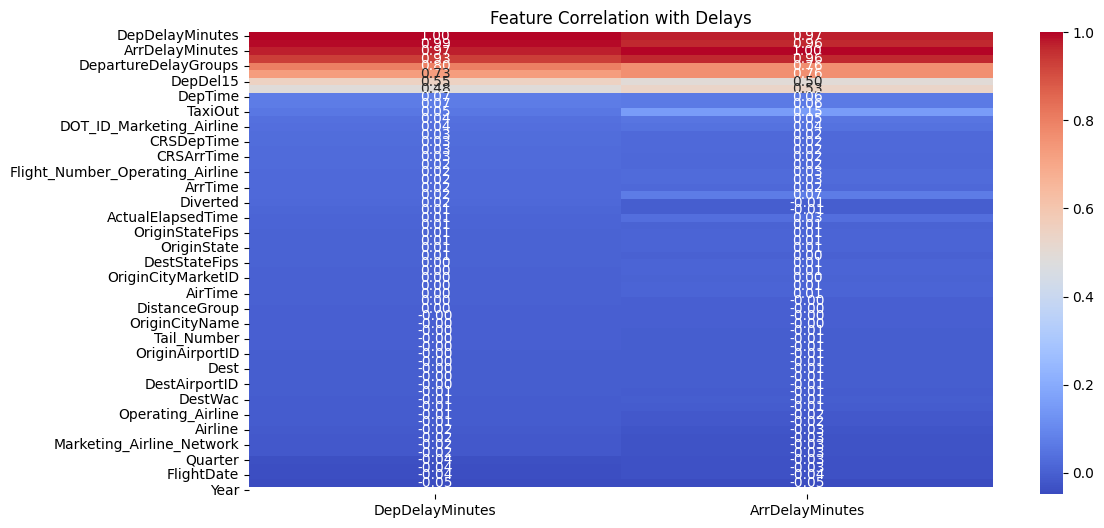

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Selecting numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Encoding categorical columns using Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Compute correlation matrix
correlation_matrix = df.corr()

# Extract correlations of delay columns (Using Correct Columns)
delay_correlations = correlation_matrix[['DepDelayMinutes', 'ArrDelayMinutes']].sort_values(
    by=['DepDelayMinutes', 'ArrDelayMinutes'], ascending=False
)

# Display top correlated features
print(delay_correlations.head(10))

# Plot the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(delay_correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Delays")
plt.show()


## **Correlation of Features with Flight Delay Status (ArrDel15)**

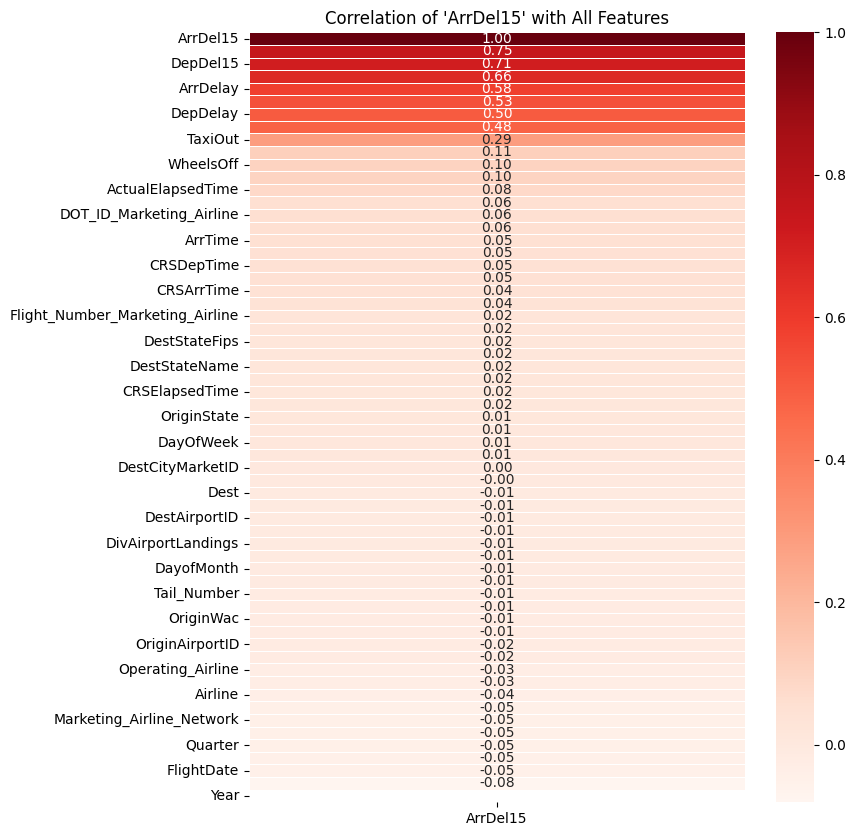

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Identify categorical and numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Encode categorical columns using Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Compute correlation of 'ArrDel15' with all columns
delayed_correlation = df.corr()[["ArrDel15"]].sort_values(by="ArrDel15", ascending=False)

# Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(delayed_correlation, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)

plt.title("Correlation of 'ArrDel15' with All Features")
plt.show()

